### Import Libraries

In [240]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

### Load Dataset

In [241]:
training=pd.read_csv('customer_churn_dataset-training-master.csv')
training.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


### Dataset Overview

In [242]:
print("Shape: ",training.shape)
print("\nData Types: ",training.dtypes)
print("\nMissing Values: ",training.isnull().sum())

Shape:  (440833, 12)

Data Types:  CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

Missing Values:  CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


### Data Cleaning

In [243]:
training=training.dropna()

In [244]:
print("Missing values after cleaning:\n", training.isnull().sum())

Missing values after cleaning:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


### Feature Engineering

In [245]:
training['Gender'] = training['Gender'].str.strip().str.capitalize()

In [246]:
training['Gender'] = training['Gender'].map({'Female': 0, 'Male': 1})

In [247]:
training = pd.get_dummies(training,columns=['Subscription Type'],drop_first=True)
training = pd.get_dummies(training,columns=['Contract Length'],drop_first=True)

In [248]:
training.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,True,False,False
1,3.0,65.0,0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,True,False
2,4.0,55.0,0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,True
3,5.0,58.0,1,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,True,False
4,6.0,23.0,1,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,False,True,False


### Define Feature & Target


In [249]:
y = training["Churn"]
x = training.drop(["Churn", "CustomerID"], axis=1)
print("x shape:",x.shape)
print("y shape:",y.shape)

x shape: (440832, 12)
y shape: (440832,)


### Train-Test Split

In [252]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2, random_state=42,stratify=y
)
print("Train size: ",x_train.shape)
print("Test size: ",x_test.shape)


Train size:  (352665, 12)
Test size:  (88167, 12)


### Feature Scaling 

In [253]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression Model

In [257]:
model = LogisticRegression(
    max_iter=2000,class_weight="balanced"
)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  0.89457506776912

Classification Report:

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.88     38167
         1.0       0.94      0.87      0.90     50000

    accuracy                           0.89     88167
   macro avg       0.89      0.90      0.89     88167
weighted avg       0.90      0.89      0.89     88167



### Random Forest Model (Comparison)

In [260]:
rf=RandomForestClassifier(
    n_estimators=100,random_state=42
)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9996597366361564

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



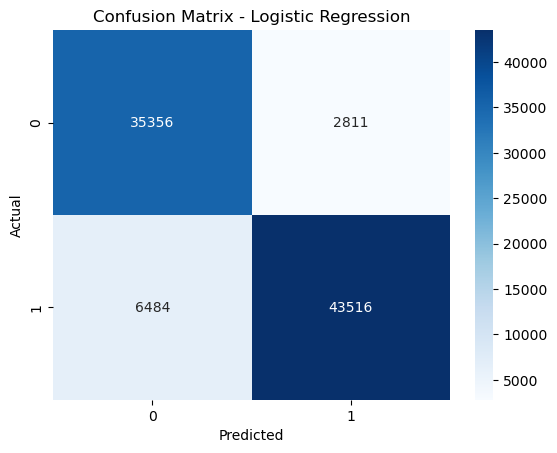

In [261]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
